In [10]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR

In [11]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")

In [12]:
print("Shape of X:", X.shape)
print("First rows:\n", X.head())

Shape of X: (442, 10)
First rows:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lrModel = LinearRegression()
lrModel.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
print(lrModel.score(X_test, y_test))

0.4526027629719195


In [15]:
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.01)

for model in [ridge, lasso]:
    model.fit(X_train, y_train)
# Since ridge and lasso are similar, I figured I could train them at the same time without confusion

In [16]:
for model in [ridge, lasso]:
    print(type(model).__name__, model.score(X_test, y_test))

Ridge 0.41915292635986545
Lasso 0.45668611945806237


In [17]:
svr = SVR(kernel='linear')

svr.fit(X_train, y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [18]:
print(svr.score(X_test, y_test))

0.020339939398460127


In [19]:
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
                                 
gbc.fit(X_train, y_train) 
# Due to the warning, I don't think Gradient boosting is a good choice for this data, but I wanted to see it work anyway

/home/stellar/FortnightBattlePass/SecondLab/venv/lib/python3.12/site-packages/sklearn/utils/multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")


,loss,'log_loss'
,learning_rate,0.05
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [20]:
print(gbc.score(X_test, y_test))
# Score of 0, oof

0.0


/home/stellar/FortnightBattlePass/SecondLab/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/home/stellar/FortnightBattlePass/SecondLab/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")


In [25]:
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_svr = svr.predict(X_test)
y_pred_gbc = gbc.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)

lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)

svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
svr_r2 = r2_score(y_test, y_pred_svr)

gbc_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbc))
gbc_r2 = r2_score(y_test, y_pred_gbc)

In [34]:
# Creating the table for the graph visualization
metrics_df = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'Support Vector Regressor', 'Gradient Boosting Classifier'],
    'RMSE': [ridge_rmse, lasso_rmse, svr_rmse, gbc_rmse],
    'R2': [ridge_r2, lasso_r2, svr_r2, gbc_r2]
})


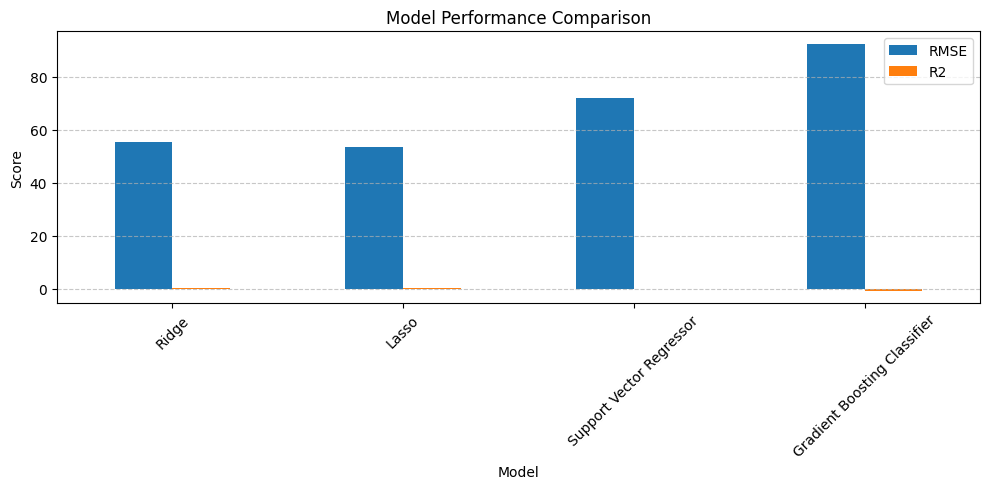

In [35]:
# Metrics across models
metrics_df.set_index('Model')[['RMSE', 'R2']].plot(kind='bar', figsize=(10,5))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

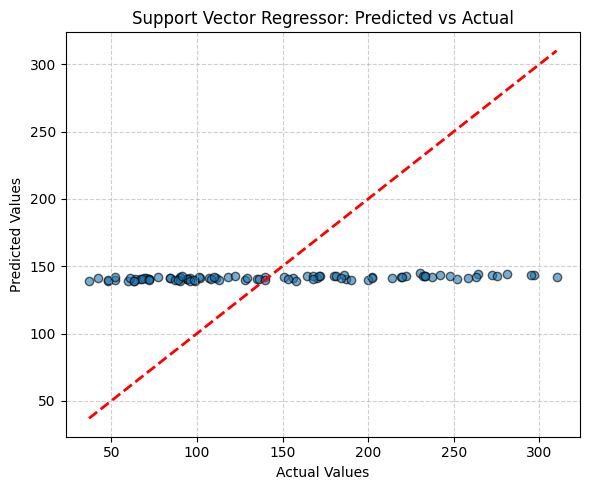

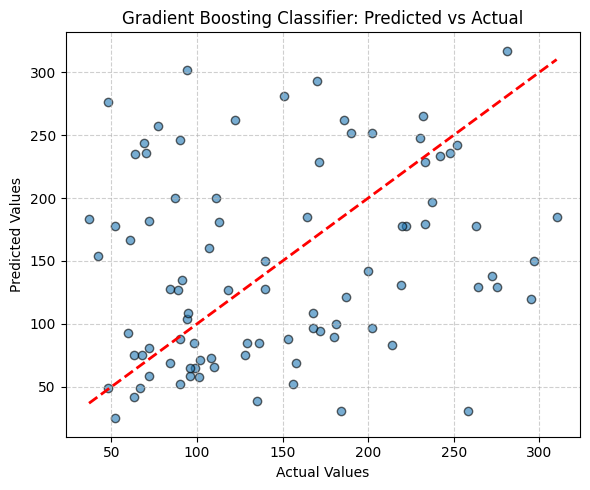

In [33]:
# Compare the top 2 models
preds = {
    'Support Vector Regressor': y_pred_svr,
    'Gradient Boosting Classifier': y_pred_gbc
}

for model_name, y_pred in preds.items():
    plt.figure(figsize=(6,5))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2)
    
    plt.title(f'{model_name}: Predicted vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

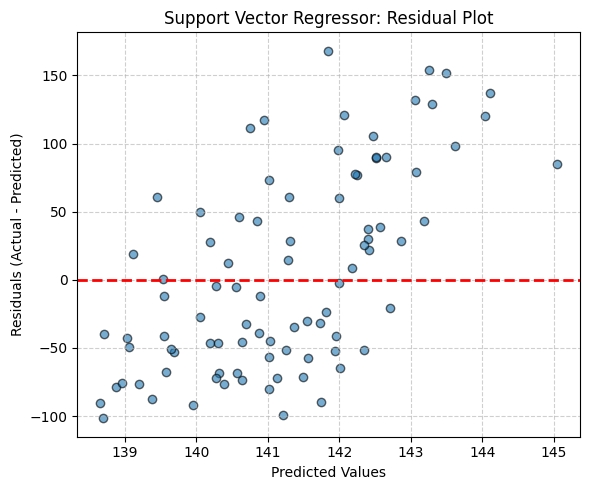

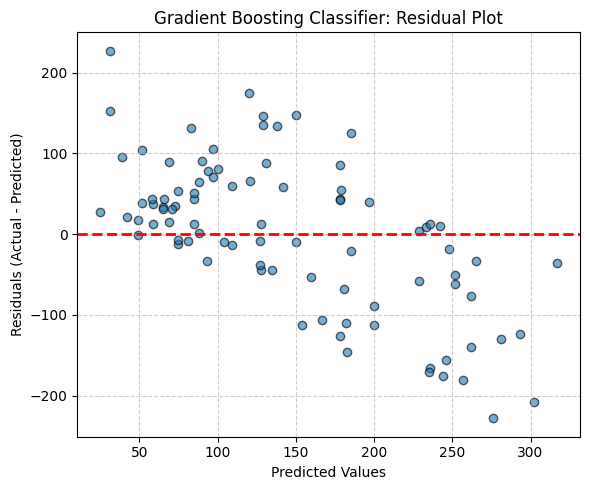

In [38]:
preds = {
    'Support Vector Regressor': y_pred_svr,
    'Gradient Boosting Classifier': y_pred_gbc
}

# Dictionary of residuals
residuals_dict = {
    'Support Vector Regressor': y_test - y_pred_svr,
    'Gradient Boosting Classifier': y_test - y_pred_gbc
}

for model_name in preds.keys():
    y_pred = preds[model_name]
    residuals = residuals_dict[model_name]
    
    plt.figure(figsize=(6,5))
    plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
    plt.axhline(0, color='r', linestyle='--', lw=2)
    plt.title(f'{model_name}: Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [39]:
# Save models as files
joblib.dump(ridge, 'ridge_model.joblib')
joblib.dump(lasso, 'lasso_model.joblib')
joblib.dump(svr, 'svr_model.joblib')
joblib.dump(gbc, 'gbc_model.joblib')

['gbc_model.joblib']